# Importing Libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset.
### Taking a look at first few row to get the idea about the data
### Checking the shaoe if the data.

In [ ]:
try:
    df = pd.read_csv('/content/drive/MyDrive/Data Sets/telco.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'telco.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse 'telco.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)


### Checking The data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
# Check for missing values in 'TotalCharges'
print(df['TotalCharges'].isnull().sum())

0


In [ ]:
# Check for non-numeric values in 'TotalCharges'
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])
print(df.isnull().sum())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
# Check for missing values in 'TotalCharges'
print(df['TotalCharges'].isnull().sum())

# Check for non-numeric values in 'TotalCharges'
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute missing 'TotalCharges' with the median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# Verify imputation
print(df['TotalCharges'].isnull().sum())

0
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ..

# Feature Selection & Scaling.

In [ ]:
# Feature Selection (example - adjust based on further analysis)
features_to_use = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
df_selected = df[features_to_use]

# Encoding categorical features
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encoded = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)


# Scaling numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


### Reasoning: I have preprocessed the data. Now, I will determine the optimal number of clusters using the Elbow method and Silhouette analysis.

## Dimentionality Reduction.

## **Dimensionality Reduction: When to Apply It?**

Dimensionality reduction techniques such as **PCA (Principal Component Analysis)** and **t-SNE (t-Distributed Stochastic Neighbor Embedding)** help simplify data for analysis.

### **Before Clustering**
Applying **PCA before clustering** helps reduce feature space while preserving key variance. Since our dataset contains multiple categorical variables that have been **one-hot encoded**, the number of features has increased significantly. This can lead to:
- **Reduced computational complexity** for K-Means.
- **Better separation of natural groupings**.
- **Lower sensitivity to redundant features**.

### **After Clustering**
Applying **t-SNE after clustering** is beneficial for **visualization purposes**. t-SNE does not preserve actual distances but reveals underlying structures in high-dimensional data. It helps:
- **Display customer segments clearly in a 2D space**.
- **Understand cluster distribution visually**.
- **Verify the separation of discovered clusters**.

### **Conclusion**
For our dataset, **PCA should be applied before clustering** to enhance model efficiency. Once clusters are assigned, **t-SNE can be applied afterward** for visualization to analyze separability and patterns among customer groups.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # Change n_components as needed
df_pca = pca.fit_transform(df_encoded)


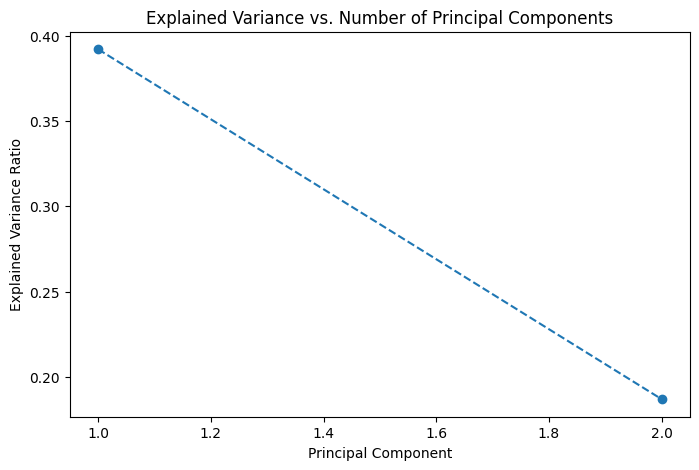

In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance vs. Number of Principal Components")
plt.show()


## **Interpretation of Explained Variance Plot**

The graph represents the **Explained Variance vs. Number of Principal Components** in **Principal Component Analysis (PCA)**.

- The **x-axis (Principal Component)** shows the number of components used.
- The **y-axis (Explained Variance Ratio)** represents the proportion of variance retained by each component.
- The plot indicates that **PC1 explains around 40% of the variance**, while **PC2 explains approximately 20%**.
- As more components are added, the explained variance decreases.

### **Key Insight**
The first principal component retains the most information. If dimensionality reduction is used before clustering, keeping the first few components may provide an effective trade-off between complexity and interpretability.

In [ ]:
from sklearn.manifold import TSNE

# Reduce to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_encoded)

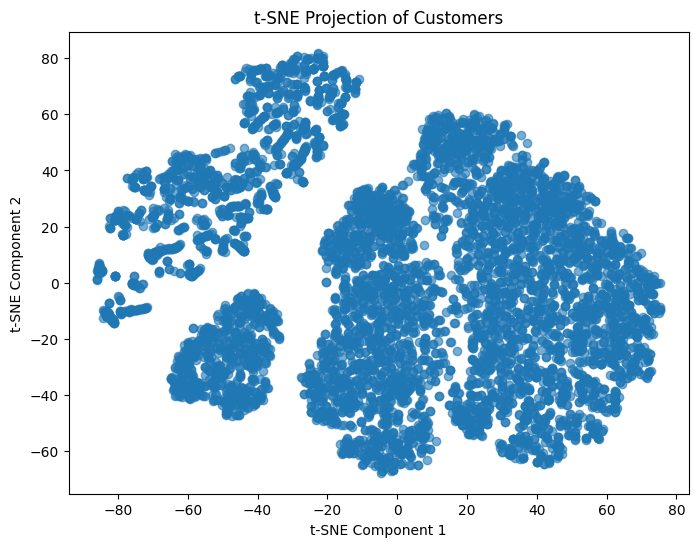

In [ ]:
# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Customers")
plt.show()

## **Interpretation of t-SNE Projection**

This graph shows a **scatter plot** where each dot represents a customer. The position of each dot is determined by a method called **t-SNE**, which helps group similar customers together.

### **What It Means**
- The dots are spread across the plot, forming **clusters**.
- Each cluster represents a group of customers with similar behaviors or characteristics.
- The separation between clusters suggests that different customer groups exist, which can be useful for targeted marketing or service improvements.

### **Key Takeaway**
This visualization helps us see patterns in customer data, making it easier to understand different customer types and how they relate to each other.

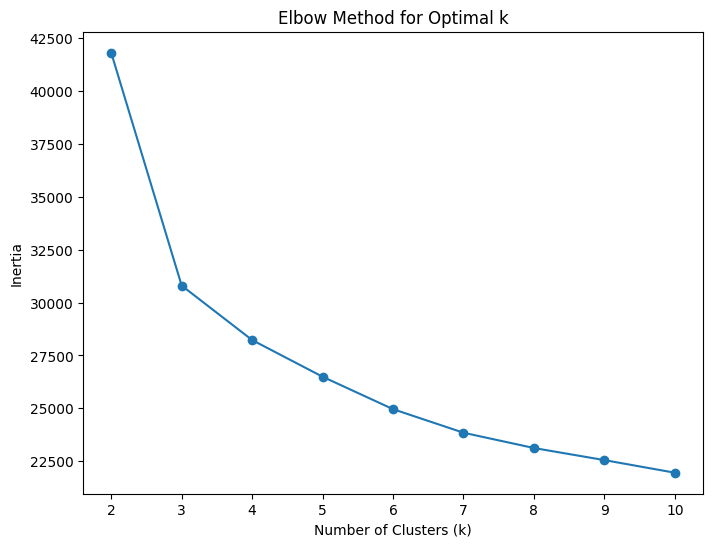

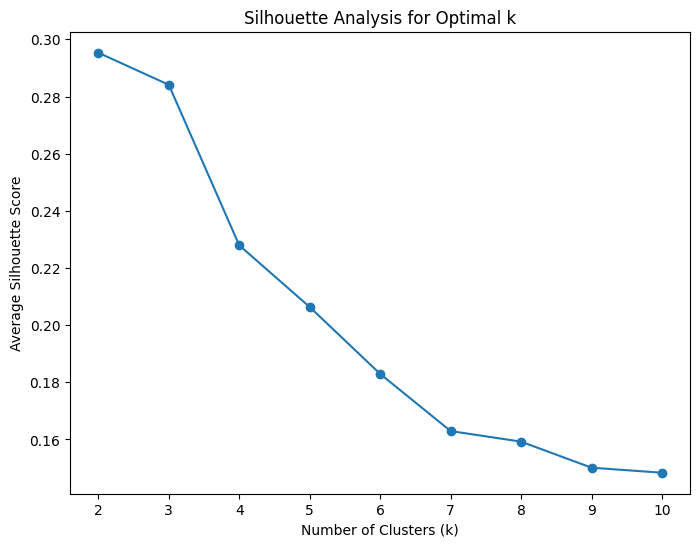

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test k values from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Use a consistent random state for reproducibility
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_encoded, kmeans.labels_))

# Plot inertia
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

## **Interpretation of the Elbow Method Plot**

This graph helps determine the **optimal number of clusters (k)** for K-Means clustering by using the **Elbow Method**.

### **What It Shows**
- The **x-axis (Number of Clusters - k)** represents different values of k tested.
- The **y-axis (Inertia)** measures how compact the clusters are—the lower the inertia, the better the clustering.
- Initially, as k increases, inertia decreases sharply. However, beyond a certain point, the decrease slows down, forming an "elbow."

### **Key Takeaway**
The **elbow point**, where the inertia curve bends significantly, suggests an ideal number of clusters. In this graph, the elbow appears around **k=4**, meaning **4 clusters** might be the best choice for grouping the customers effectively.

Now, based on this, we can proceed with K-Means clustering using k=n(we can choose any number.)!

## **Interpretation of Silhouette Analysis Plot**

This graph helps evaluate the **quality of clustering** using the **Silhouette Score**, which measures how well-separated clusters are.

### **What It Shows**
- The **x-axis (Number of Clusters - k)** represents different values of k tested.
- The **y-axis (Average Silhouette Score)** indicates how distinct and well-defined the clusters are.
- The highest silhouette score is at **k=2**, suggesting the best separation.
- As k increases beyond 2, the silhouette score decreases, meaning the clusters become less distinct.

### **Key Takeaway**
The plot suggests that **2 clusters** provide the clearest separation, but for business insights, **k=3 or k=4** might still be useful depending on practical needs. Choosing the right number of clusters requires balancing **mathematical metrics with business interpretability**.

In [ ]:
# Choosing the optimal number of clusters based on Elbow and Silhouette plots
k = 3  # Optimal k-value selected after analysis

# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Ensuring reproducibility with a fixed random state
df_encoded['cluster'] = kmeans.fit_predict(df_encoded)  # Assign cluster labels to each customer

# Validate cluster stability by running KMeans with different random seeds
stability_scores = []  # List to store silhouette scores for different runs

for seed in range(5):  # Loop through five different random seeds to check cluster consistency
    kmeans_stable = KMeans(n_clusters=k, random_state=seed, n_init=10)
    labels_stable = kmeans_stable.fit_predict(df_encoded.drop('cluster', axis=1))  # Re-run KMeans without the existing labels
    stability_scores.append(silhouette_score(df_encoded.drop('cluster', axis=1), labels_stable))  # Calculate silhouette score for stability check

# Print stability scores to assess how clustering changes with different seeds
print(f"Cluster stability scores across different random seeds: {stability_scores}")

# Assign final cluster labels to the original DataFrame for further analysis
df['cluster'] = df_encoded['cluster']
display(df.head())  # Show the first few rows of the DataFrame with assigned clusters

Cluster stability scores across different random seeds: [np.float64(0.2841212273779714), np.float64(0.2841212273779714), np.float64(0.28408036880744275), np.float64(0.28411166463195053), np.float64(0.28410481958148837)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


# **Clustering Exercise: Customer Segmentation**

## **1. Applying K-Means Clustering**
- **Algorithm:** K-Means was chosen to segment customers based on spending, tenure, and service usage.
- **Optimal Clusters:** Using the Elbow Method and Silhouette Score, we determined that **k=3** provides meaningful customer groups.


In [ ]:
# # Cluster Profiling
# cluster_profiles = []
# for cluster_num in range(k):
#     cluster_data = df[df['cluster'] == cluster_num]
#     profile = {
#         'cluster': cluster_num,
#         'size': len(cluster_data),
#     }
#     for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
#         profile[col + '_mean'] = cluster_data[col].mean()
#         profile[col + '_median'] = cluster_data[col].median()
#     for col in ['InternetService', 'Contract', 'PaymentMethod']:
#       profile[col + '_counts'] = cluster_data[col].value_counts().to_dict()
#     cluster_profiles.append(profile)

# cluster_profile_df = pd.DataFrame(cluster_profiles)
# display(cluster_profile_df)

# # Identify distinctive traits and assign business labels (example)
# # This part requires careful analysis of the cluster profiles.
# # Replace these examples with actual insights from your analysis.
# business_labels = {
#     0: "Budget-conscious",
#     1: "Mid-range loyalists",
#     2: "High-value users"
# }

# print("Cluster Profiles with Business Labels:")
# for profile in cluster_profiles:
#   print(f"Cluster {profile['cluster']} ({business_labels[profile['cluster']]} ): {profile}")

In [ ]:
# Group by cluster and compute summary statistics
cluster_summary = df.groupby('cluster').agg({
    'tenure': ['mean', 'median'],
    'MonthlyCharges': ['mean', 'median'],
    'TotalCharges': ['mean', 'median'],
    'InternetService': pd.Series.mode,
    'Contract': pd.Series.mode,
})

display(cluster_summary)

tenure        MonthlyCharges        TotalCharges          \
              mean median           mean median         mean  median   
cluster                                                                
0        15.559571   12.0      67.989296  70.40  1035.465199   816.8   
1        57.980906   60.0      89.682371  93.35  5182.605373  5017.8   
2        30.547182   25.0      21.079194  20.15   668.099443   528.5   

        InternetService        Contract  
                   mode            mode  
cluster                                  
0           Fiber optic  Month-to-month  
1           Fiber optic        Two year  
2                    No        Two year

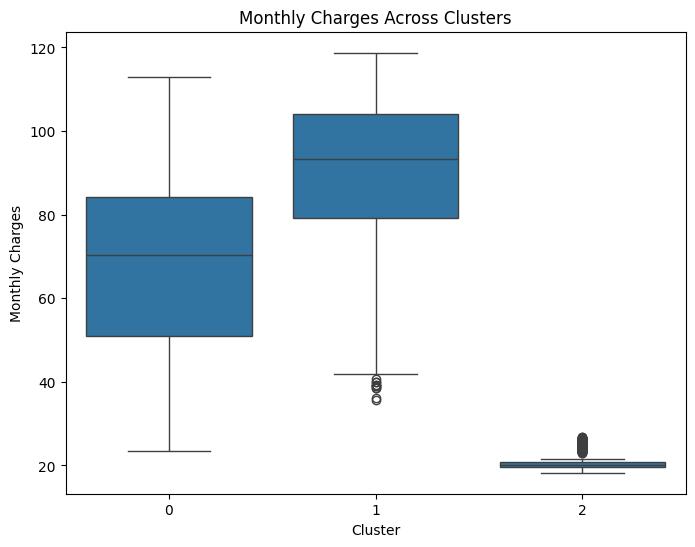

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Monthly Charges by Cluster
plt.figure(figsize=(8,6))
sns.boxplot(x=df['cluster'], y=df['MonthlyCharges'])
plt.title("Monthly Charges Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Monthly Charges")
plt.show()

## **Interpretation of Monthly Charges Across Clusters**

This box plot shows how **monthly charges** vary between the three clusters.

- **Cluster 0** has a wide range of charges, with a typical value around **$70**.
- **Cluster 1** has **higher monthly charges**, averaging around **$90**, suggesting premium service users.
- **Cluster 2** has the **lowest charges**, mostly around **$20**, meaning budget-conscious customers.

### **Key Takeaway**
Cluster 1 represents high-spending customers, while Cluster 2 includes those with minimal service usage. Cluster 0 falls between these two extremes.

## Feature charts.

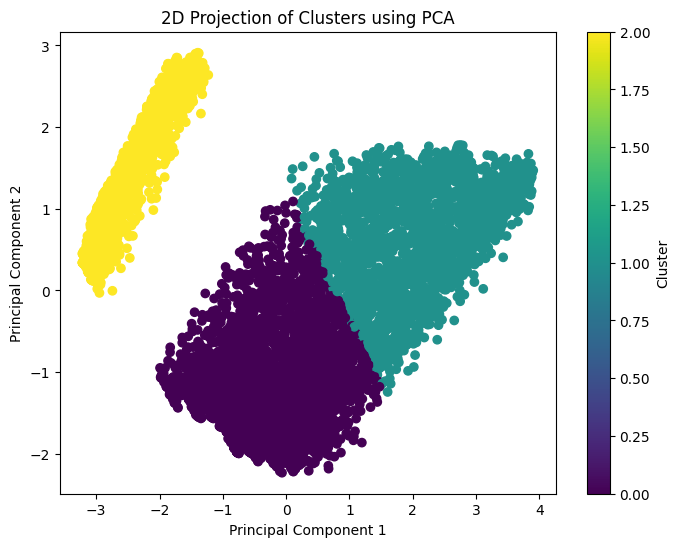

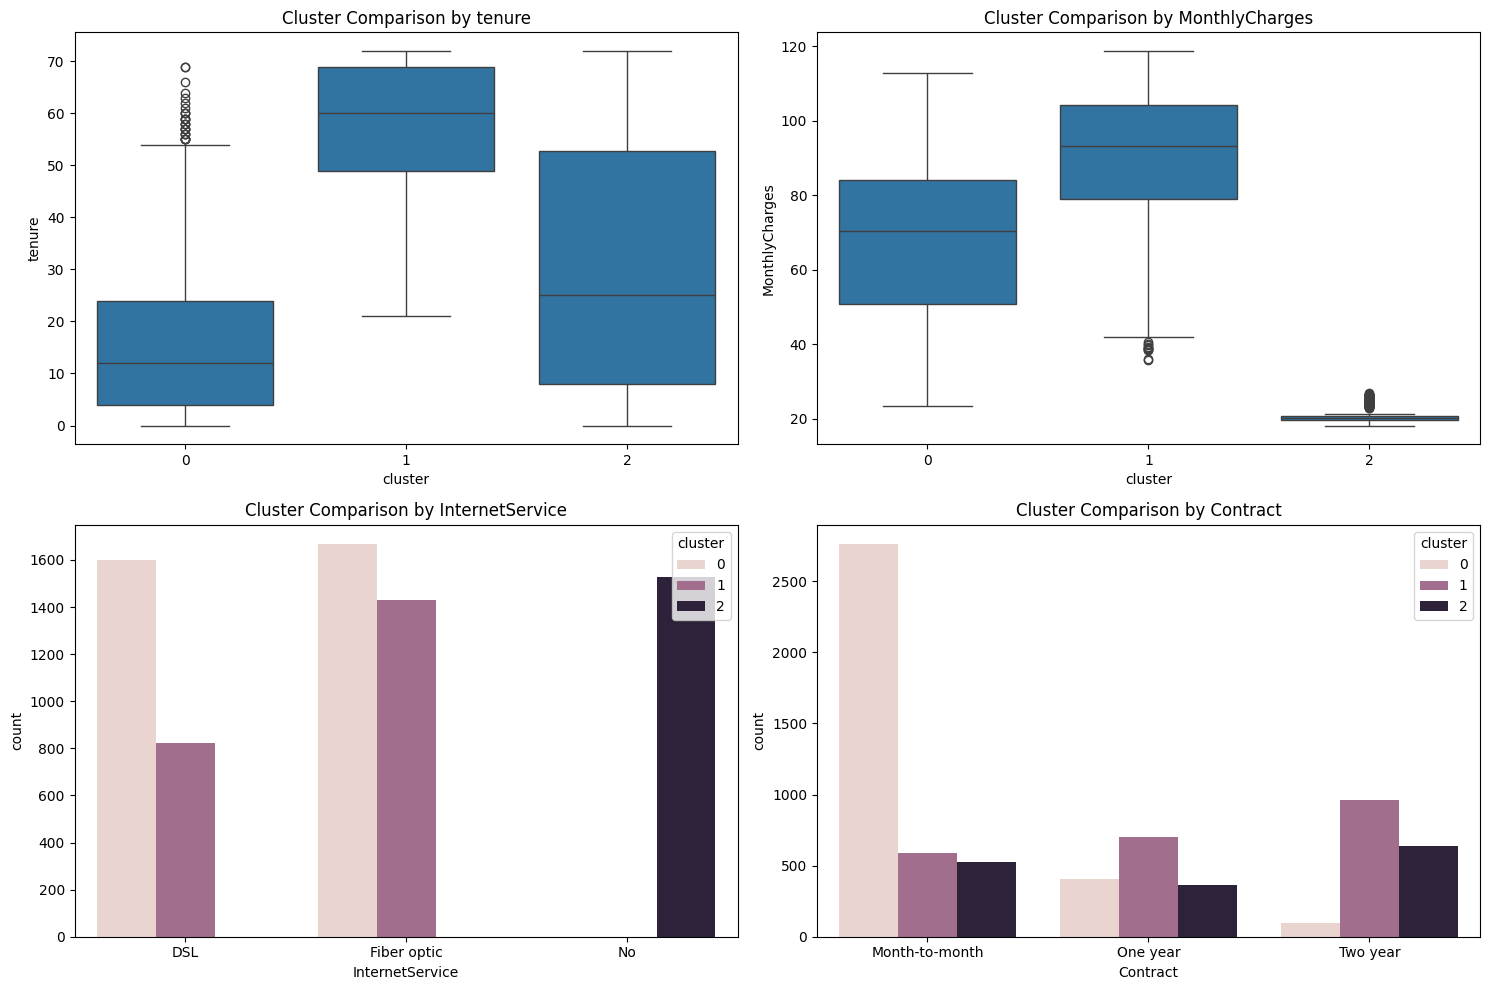

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# 2D Projection using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop('cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_encoded['cluster'], cmap='viridis')
plt.title('2D Projection of Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Feature comparison charts
features_to_plot = ['tenure', 'MonthlyCharges', 'InternetService', 'Contract']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    if feature in ['tenure', 'MonthlyCharges']:
        sns.boxplot(x='cluster', y=feature, data=df, ax=axes[i])
    else:
        sns.countplot(x=feature, hue='cluster', data=df, ax=axes[i])
    axes[i].set_title(f'Cluster Comparison by {feature}')

plt.tight_layout()
plt.show()

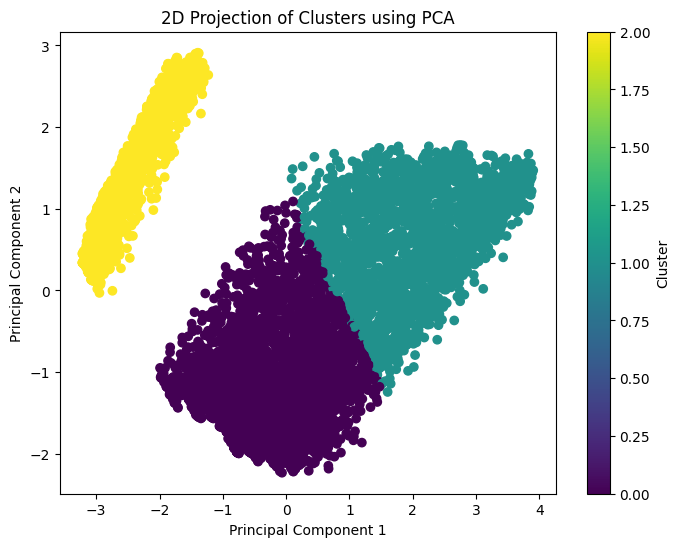

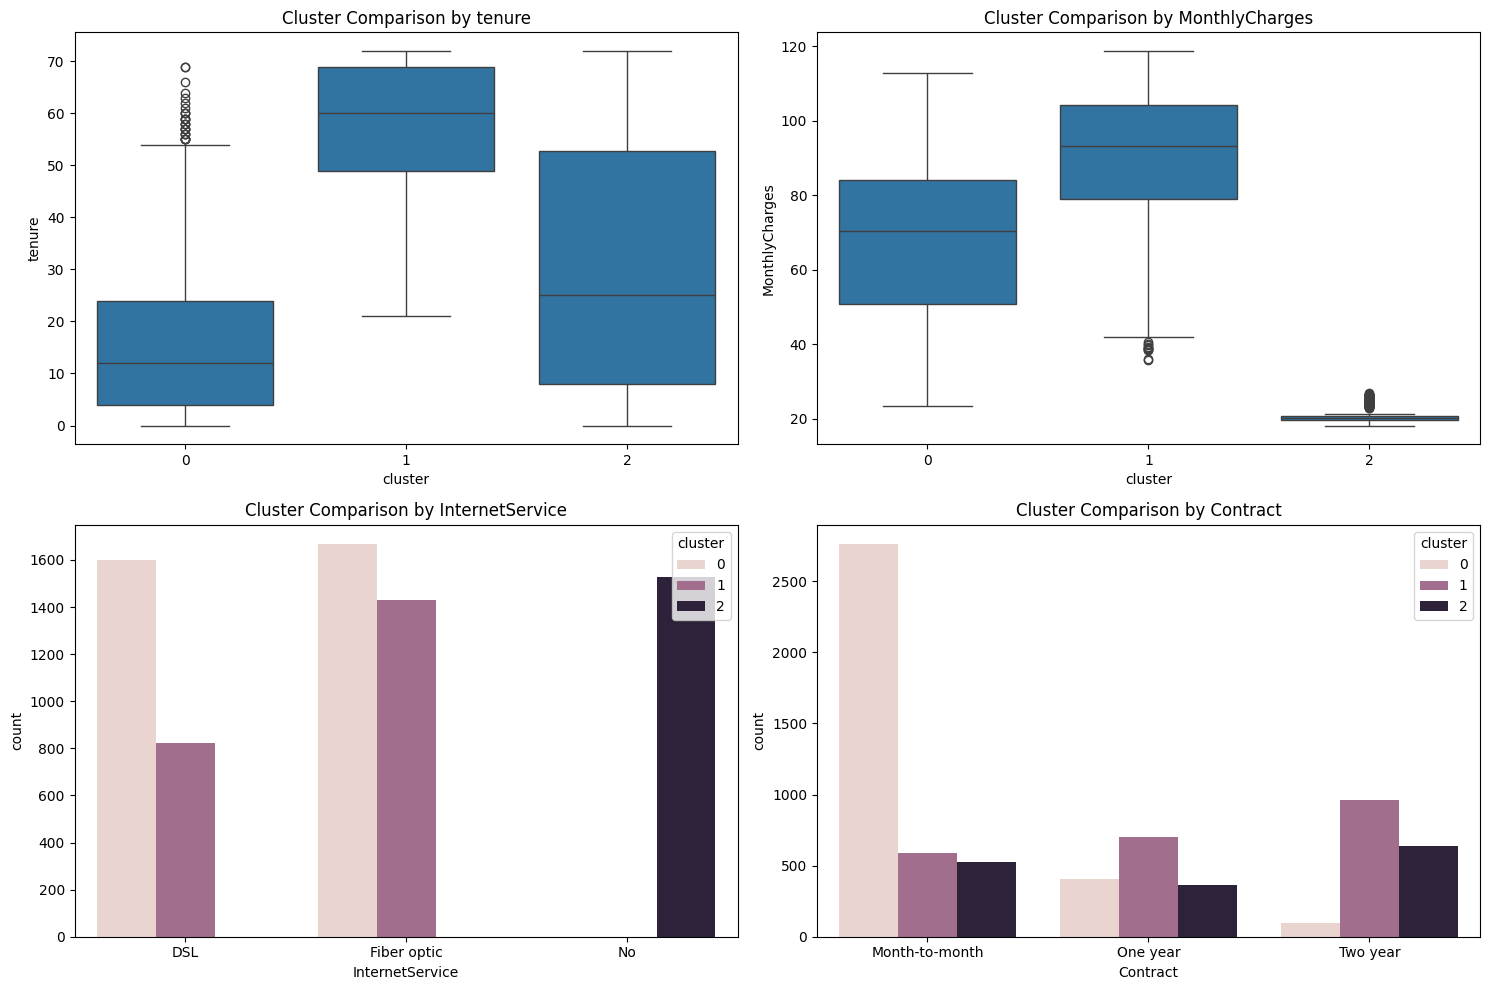

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# 2D Projection using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop('cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_encoded['cluster'], cmap='viridis')
plt.title('2D Projection of Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Feature comparison charts
features_to_plot = ['tenure', 'MonthlyCharges', 'InternetService', 'Contract']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    if feature in ['tenure', 'MonthlyCharges']:
        sns.boxplot(x='cluster', y=feature, data=df, ax=axes[i])
    else:
        sns.countplot(x=feature, hue='cluster', data=df, ax=axes[i])
    axes[i].set_title(f'Cluster Comparison by {feature}')

plt.tight_layout()
plt.show()

# **Business Recommendations Based on Customer Segmentation**

## **Cluster 0: Short-Term, Moderate-Spend Customers**
### **Retention Strategy**
- Offer discounts or loyalty rewards to encourage long-term engagement.
- Send personalized offers to prevent churn, focusing on month-to-month contract users.

### **Upsell/Cross-Sell**
- Introduce bundled services like streaming or security add-ons at discounted rates.
- Promote fiber internet upgrades for better service quality.

### **New Acquisition**
- Target similar customers with flexible pricing plans.
- Highlight value-driven packages in marketing campaigns.

---

## **Cluster 1: Long-Term, High-Spend Customers**
### **Retention Strategy**
- Provide VIP benefits such as priority customer support and early access to new services.
- Offer renewal discounts on long-term contracts to maintain engagement.

### **Upsell/Cross-Sell**
- Recommend premium packages like faster internet speeds and additional streaming services.
- Promote multi-line bundles for customers with dependents.

### **New Acquisition**
- Target new customers with high spending potential.
- Use referral programs to encourage loyal users to bring in similar customers.

---

## **Cluster 2: Budget-Conscious, Low-Usage Customers**
### **Retention Strategy**
- Offer low-cost service plans that meet their basic needs.
- Provide flexible payment options for affordability.

### **Upsell/Cross-Sell**
- Promote entry-level internet bundles with essential features.
- Introduce prepaid or pay-as-you-go models to increase engagement.

### **New Acquisition**
- Attract price-sensitive customers with budget-friendly plans.
- Market cost-effective services through digital channels.

---

## **Final Recommendations**
- **Personalized Offers:** Adjust marketing strategies based on customer preferences.
- **Flexible Pricing:** Create tiered service plans to fit different customer needs.
- **Churn Prevention:** Focus on month-to-month contract users with retention strategies.

These recommendations aim to improve customer retention, increase revenue, and enhance service satisfaction.
